<a href="https://colab.research.google.com/github/juanmatarga/UCEMA/blob/main/The_Phillips_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LA CURVA DE PHILLIPS: ANÁLISIS DE EE.UU., ALEMANIA Y REINO UNIDO** *texto en cursiva*

**CARGA DE BASE DE DATOS Y SCATTER PLOT: INFLACIÓN Y DESEMPLEO POR PAÍS**

*En esta primera parte, cargamos la base de datos y le pedimos al programa que la lea y la guarde en "database", luego definimos paises y columnas para poder realizar nuestro analisis, y creamos una función para poder graficar un scatter plot de cada país.*

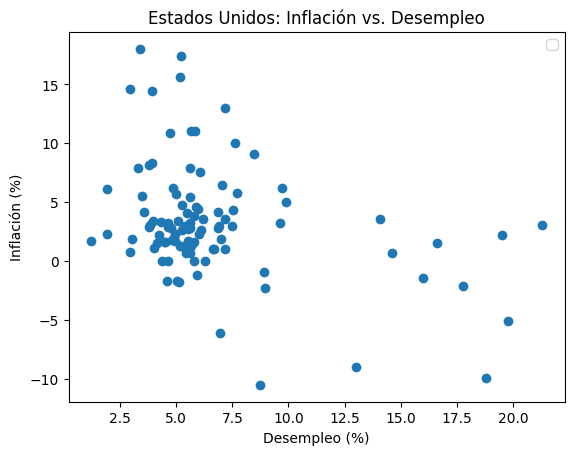

<Figure size 1920x1080 with 0 Axes>

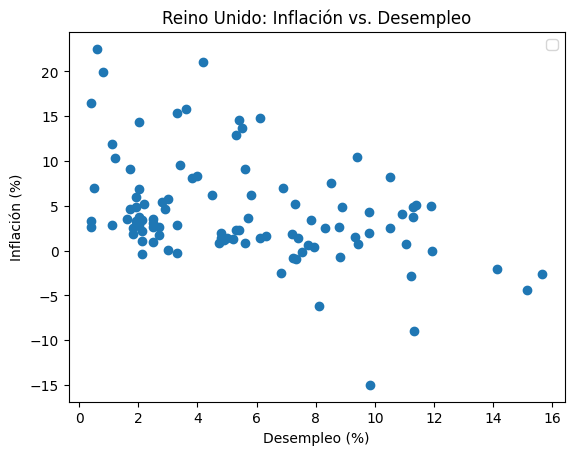

<Figure size 1920x1080 with 0 Axes>

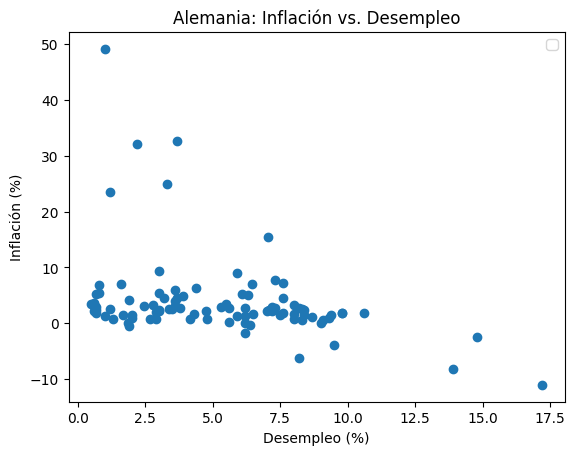

<Figure size 1920x1080 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

database = pd.read_excel("bdd_phillips_trabajo_final.xlsx", engine="openpyxl")

paises = ["Estados Unidos", "Reino Unido", "Alemania"]
columnas = [["usi", "usu"], ["uki", "uku"], ["gi", "gu"]]

for pais, columns in zip(paises, columnas):
    pais_data = database[columns]

    plt.scatter(pais_data[columns[1]], pais_data[columns[0]])

    plt.legend()
    plt.xlabel("Desempleo (%)")
    plt.ylabel("Inflación (%)")
    plt.title(f"{pais}: Inflación vs. Desempleo")
    plt.figure(figsize=(19.2, 10.8))
    plt.show()


 **GRÁFICO DE LINEAS: EVOLUCIÓN DE INFLACIÓN Y DESEMPLEO A TRAVÉS DEL TIEMPO POR PAÍS**

 *Hicimos estos gráficos para poder demostrar visualmente la evolución de cada variable a través del tiempo por país, y poder identificar los periodos en los que existe una correlación inversa entre inflación y desempleo.*

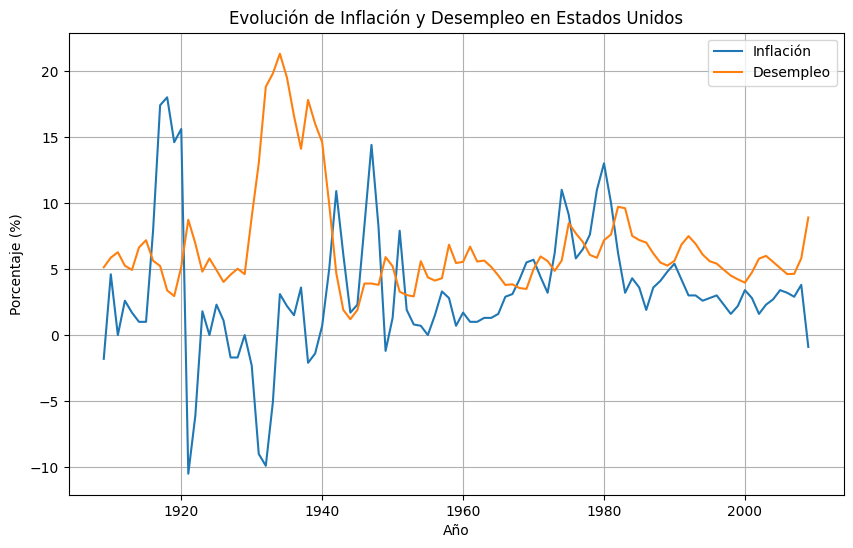

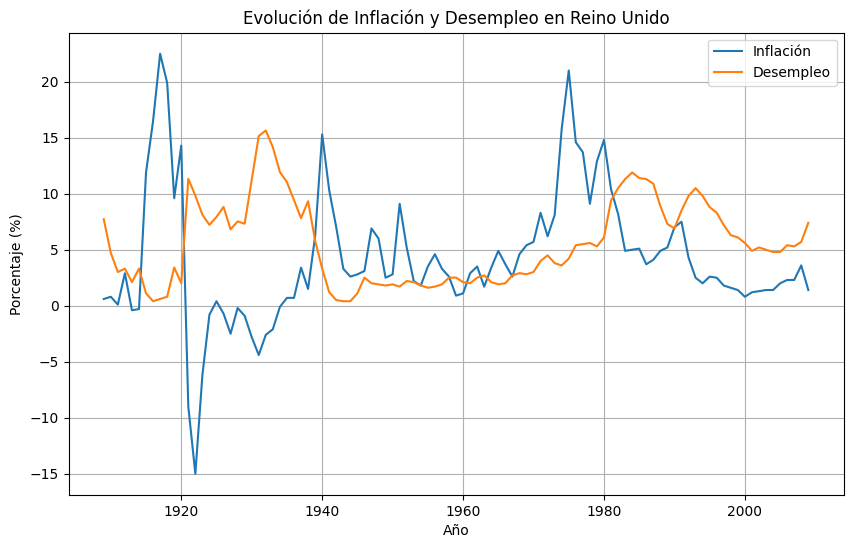

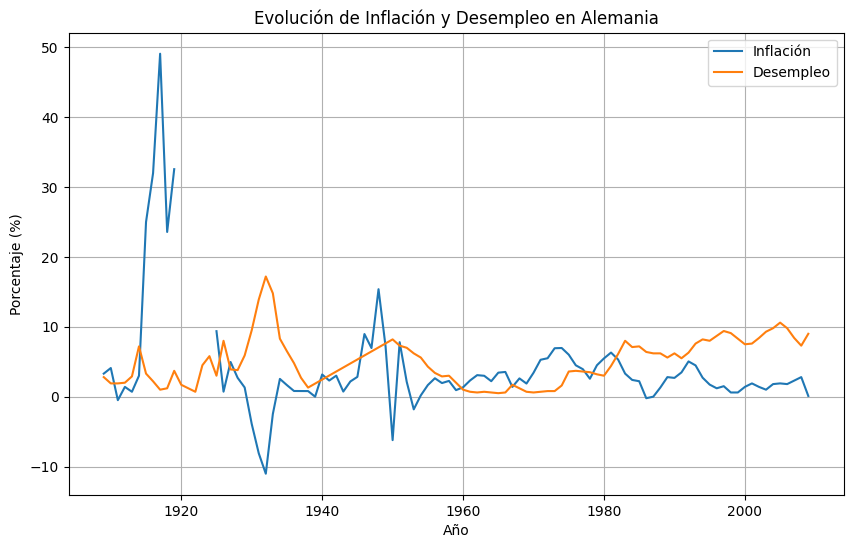

In [7]:
for pais, columns in zip(paises, columnas):
    pais_data = database[["Año"] + columns]

    plt.figure(figsize=(10, 6))
    plt.plot(pais_data["Año"], pais_data[columns[0]], label="Inflación")
    plt.plot(pais_data["Año"], pais_data[columns[1]], label="Desempleo")

    plt.legend()
    plt.xlabel("Año")
    plt.ylabel("Porcentaje (%)")
    plt.title(f"Evolución de Inflación y Desempleo en {pais}")
    plt.grid(True)
    plt.show()

**SCATTER PLOT + REGRESIÓN: CORRELACIÓN ENTRE INFLACIÓN Y DESEMPLEO ANUAL POR PAÍS**

*En estos gráficos, analizamos la evolución del índice de correlación entre inflación y desempleo a través del tiempo por país. De cumplirse la curva de Phillips, el índice de correlación debería de estar muy cerca de -1 (correlación inversa perfecta). El índice de correlación es recalculado para cada año, sumando a ese año los nuevos datos de inflación y desempleo.*

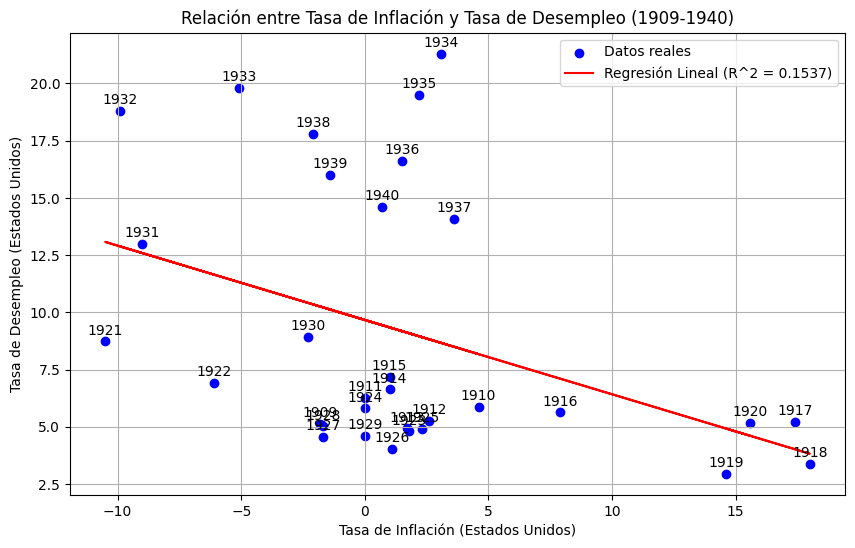

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('database_1941+.xlsx')

X = df[['usi']]
y = df['usu']
model = LinearRegression().fit(X, y)

df['usu_pred'] = model.predict(X)

r_squared = r2_score(y, df['usu_pred'])

plt.figure(figsize=(10, 6))
plt.scatter(df['usi'], df['usu'], label='Datos reales', color='blue')
plt.plot(df['usi'], df['usu_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

plt.xlabel('Tasa de Inflación (Estados Unidos)')
plt.ylabel('Tasa de Desempleo (Estados Unidos)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1909-1940)')

for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['usi'][i], df['usu'][i]), textcoords="offset points", xytext=(0,5), ha='center')


plt.legend()
plt.grid(True)
plt.show()


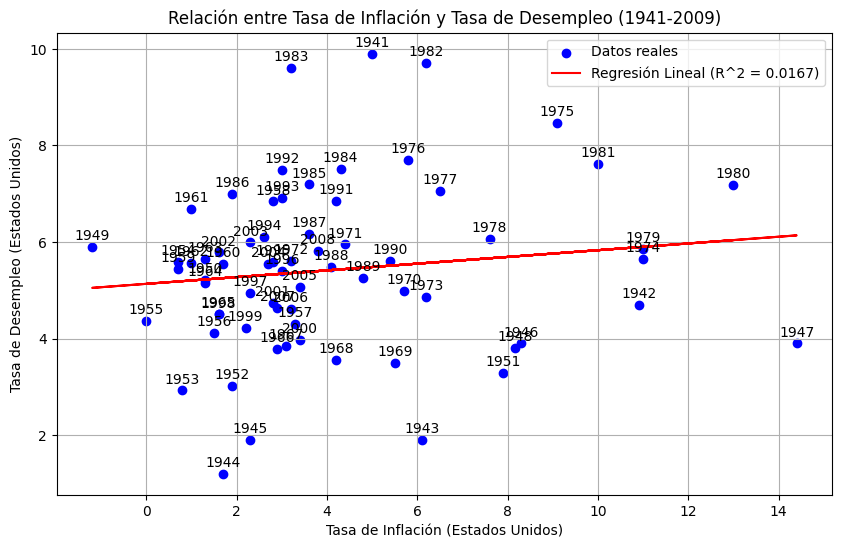

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('database_1941++.xlsx')

X = df[['usi']]
y = df['usu']
model = LinearRegression().fit(X, y)

df['usu_pred'] = model.predict(X)

r_squared = r2_score(y, df['usu_pred'])

plt.figure(figsize=(10, 6))
plt.scatter(df['usi'], df['usu'], label='Datos reales', color='blue')
plt.plot(df['usi'], df['usu_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

plt.xlabel('Tasa de Inflación (Estados Unidos)')
plt.ylabel('Tasa de Desempleo (Estados Unidos)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1941-2009)')

for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['usi'][i], df['usu'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

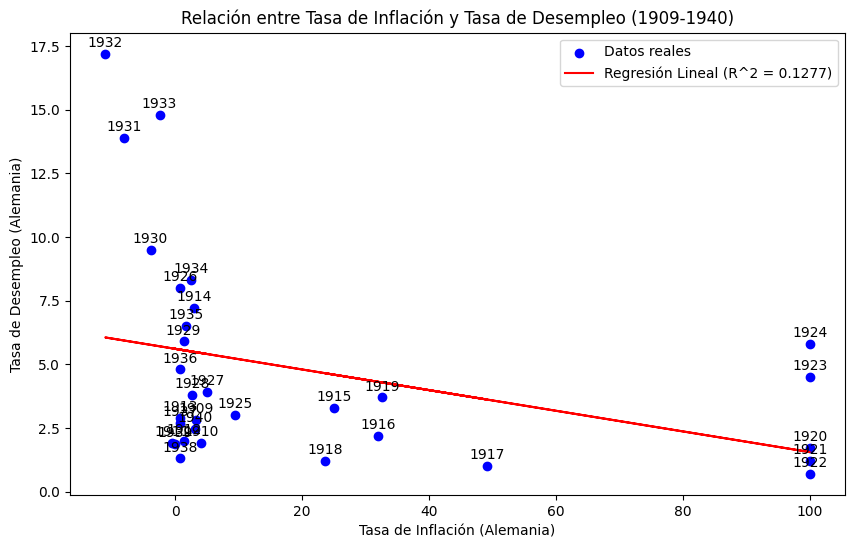

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('database_1941+.xlsx')

X = df[['gi']]
y = df['gu']
model = LinearRegression().fit(X, y)

df['gu_pred'] = model.predict(X)

r_squared = r2_score(y, df['gu_pred'])

plt.figure(figsize=(10, 6))
plt.scatter(df['gi'], df['gu'], label='Datos reales', color='blue')
plt.plot(df['gi'], df['gu_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

plt.xlabel('Tasa de Inflación (Alemania)')
plt.ylabel('Tasa de Desempleo (Alemania)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1909-1940)')

for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['gi'][i], df['gu'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()
plt.grid


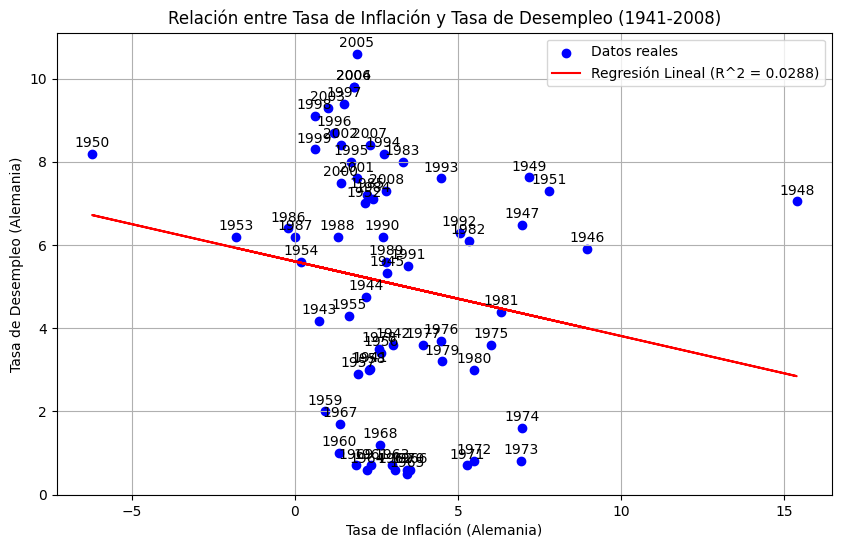

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('database_1941++.xlsx')

X = df[['gi']]
y = df['gu']
model = LinearRegression().fit(X, y)

df['gu_pred'] = model.predict(X)

r_squared = r2_score(y, df['gu_pred'])

plt.figure(figsize=(10, 6))
plt.scatter(df['gi'], df['gu'], label='Datos reales', color='blue')
plt.plot(df['gi'], df['gu_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

plt.xlabel('Tasa de Inflación (Alemania)')
plt.ylabel('Tasa de Desempleo (Alemania)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1941-2008)')

for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['gi'][i], df['gu'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()
plt.grid(True)
plt.show()


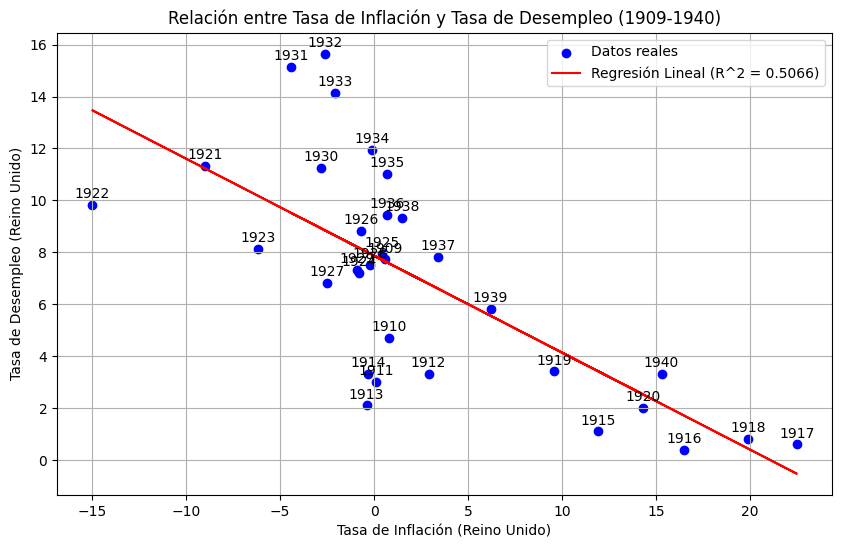

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar los datos desde el archivo Excel
df = pd.read_excel('database_1941+.xlsx')

# Crear un modelo de regresión lineal
X = df[['uki']]
y = df['uku']
model = LinearRegression().fit(X, y)

# Realizar predicciones para obtener valores ajustados
df['uku_pred'] = model.predict(X)

# Calcular el coeficiente de determinación (R cuadrado)
r_squared = r2_score(y, df['uku_pred'])

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['uki'], df['uku'], label='Datos reales', color='blue')
plt.plot(df['uki'], df['uku_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

# Añadir etiquetas y título
plt.xlabel('Tasa de Inflación (Reino Unido)')
plt.ylabel('Tasa de Desempleo (Reino Unido)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1909-1940)')

# Añadir etiquetas para cada punto
for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['uki'][i], df['uku'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Mostrar el gráfico
plt.legend()
plt.grid(True)
plt.show()


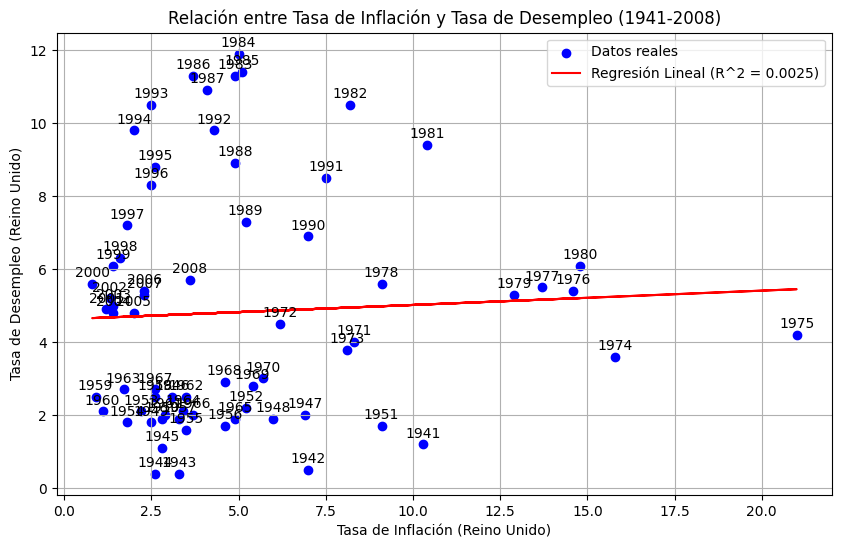

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('database_1941++.xlsx')

X = df[['uki']]
y = df['uku']
model = LinearRegression().fit(X, y)

df['uku_pred'] = model.predict(X)

r_squared = r2_score(y, df['uku_pred'])

plt.figure(figsize=(10, 6))
plt.scatter(df['uki'], df['uku'], label='Datos reales', color='blue')
plt.plot(df['uki'], df['uku_pred'], label=f'Regresión Lineal (R^2 = {r_squared:.4f})', color='red')

plt.xlabel('Tasa de Inflación (Reino Unido)')
plt.ylabel('Tasa de Desempleo (Reino Unido)')
plt.title('Relación entre Tasa de Inflación y Tasa de Desempleo (1941-2008)')

for i in range(len(df['Año'])):
    plt.annotate(df['Año'][i], (df['uki'][i], df['uku'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# ***LA CURVA DE PHILLIPS: ANÁLISIS DE LATINOAMERICA***

In [35]:
argu = pd.read_excel("arg_u.xlsx")
argi = pd.read_excel("arg_i.xlsx")

brau = pd.read_excel("bra_u.xlsx")
brai = pd.read_excel("bra_i.xlsx")

uyu = pd.read_excel("uy_u.xlsx")
uyi = pd.read_excel("uy_i.xlsx")

chu = pd.read_excel("ch_u.xlsx")
chi = pd.read_excel("ch_i.xlsx")

pyu = pd.read_excel("py_u.xlsx")
pyi = pd.read_excel("py_i.xlsx")

mexu = pd.read_excel("mex_u.xlsx")
mexi = pd.read_excel("mex_i.xlsx")

vzu = pd.read_excel("vz_u.xlsx")
vzi = pd.read_excel("vz_i.xlsx")

database_arg = pd.merge(argu,argi,on="year")
database_bra = pd.merge(brau,brai,on="year")
database_uy = pd.merge(uyu,uyi,on="year")
database_ch = pd.merge(chu,chi,on="year")
database_py = pd.merge(pyu,pyi,on="year")
database_mex = pd.merge(mexu,mexi,on="year")
database_vz = pd.merge(vzu,vzi,on="year")